In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
data = pd.read_csv('regression_data1.csv', sep=",")
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [6]:
file1= pd.read_csv('marketing_customer_analysis.csv')

In [7]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df = pd.DataFrame(file1)
print (df.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [9]:
X_num = file1.select_dtypes(include = np.number)
X_cat = file1.select_dtypes(include = np.object)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
X_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


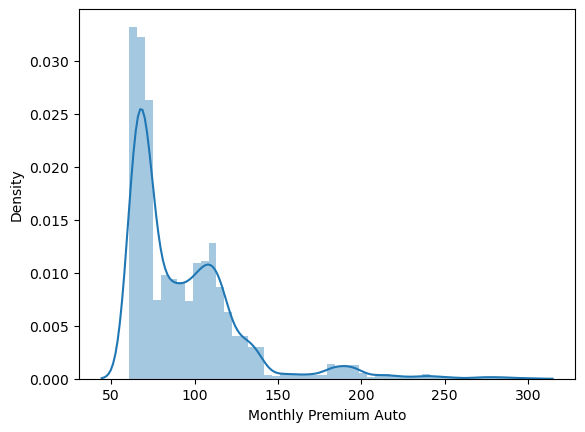

In [11]:
sns.distplot(file1['Monthly Premium Auto'])
plt.show()

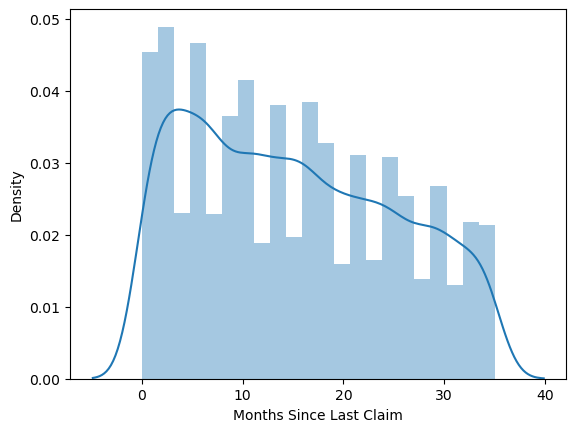

In [12]:
sns.distplot(file1['Months Since Last Claim'])
plt.show()

In [14]:
transformer = MinMaxScaler().fit(X_num) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(X_num) #This is a an array of arrays
print(x_minmax.shape)

(9134, 8)


In [15]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])

In [16]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

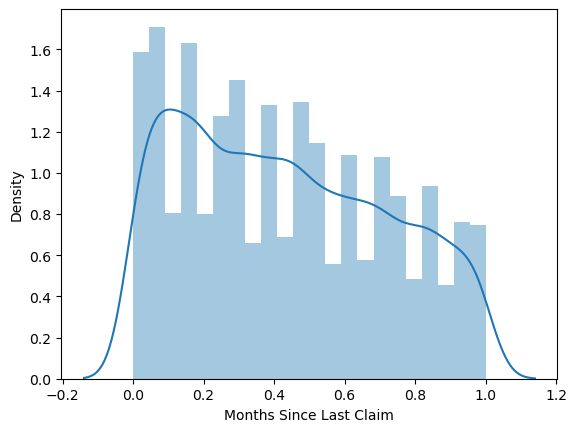

In [17]:
sns.distplot(X_num_norm['Months Since Last Claim'])

In [18]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

In [19]:
X_num_stand = pd.DataFrame(x_standardized, columns=X_num.columns)
X_num_stand.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

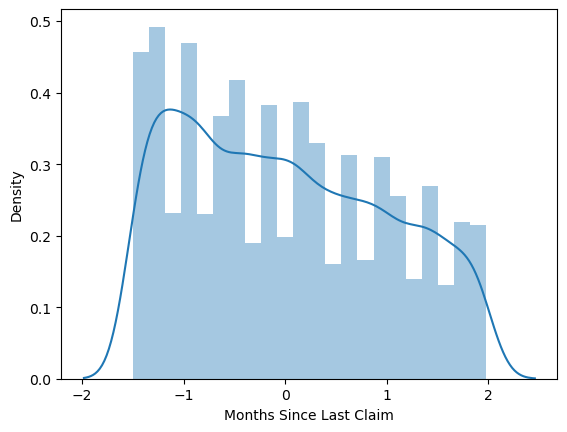

In [20]:
sns.distplot(X_num_stand['Months Since Last Claim'])

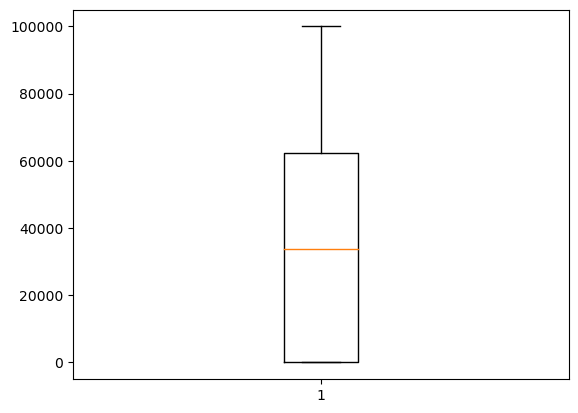

In [21]:
plt.boxplot(file1['Income'])
plt.show()

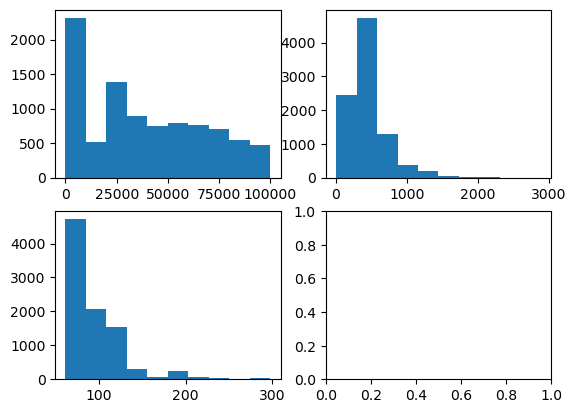

In [31]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(file1['Income'])
axs[0, 1].hist(file1['Total Claim Amount'])
axs[1, 0].hist(file1['Monthly Premium Auto'])


plt.show()

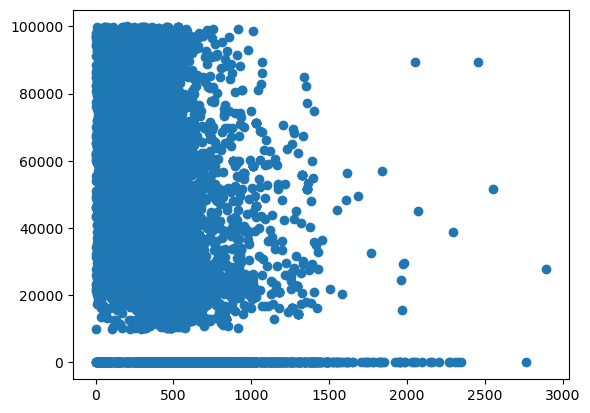

In [33]:
x = file1['Total Claim Amount']
y = file1['Income']

plt.scatter(x, y)
plt.show()

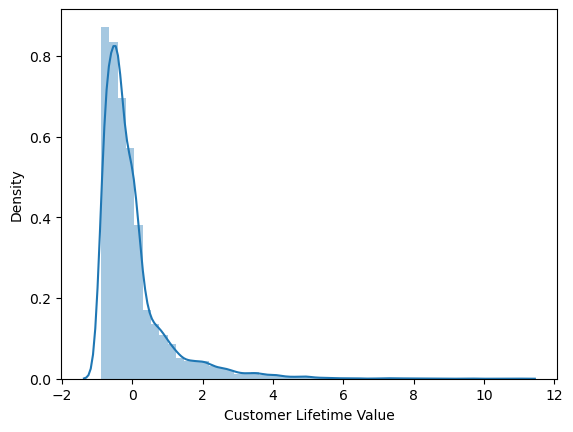

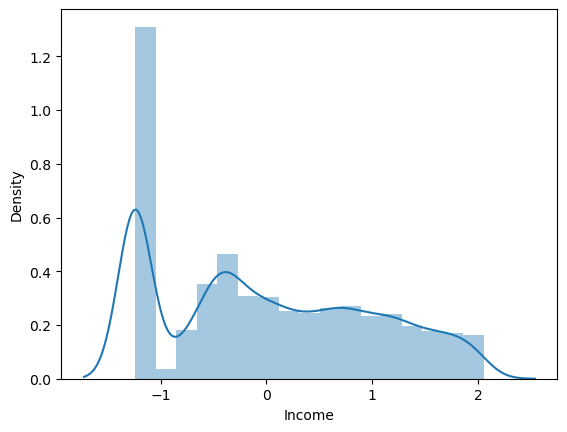

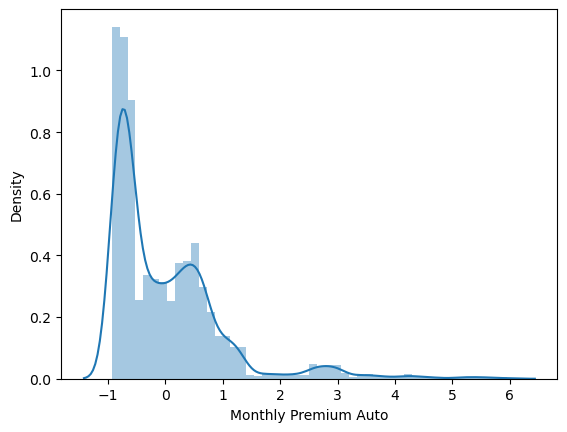

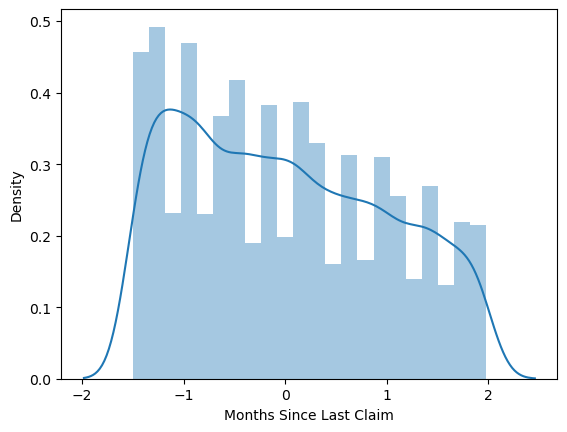

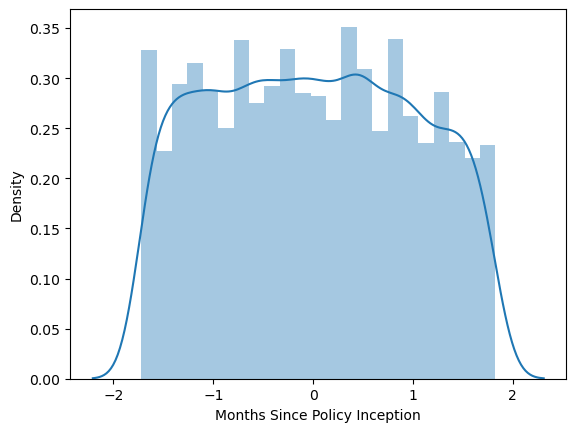

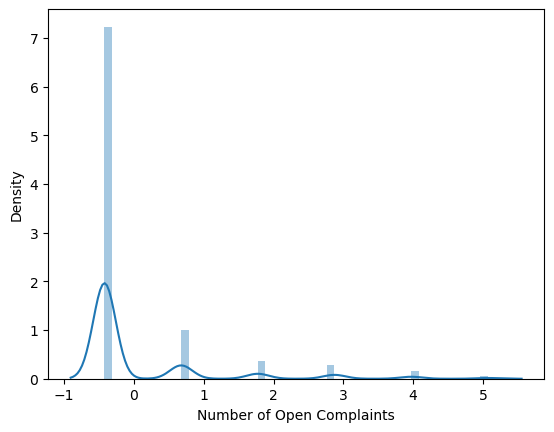

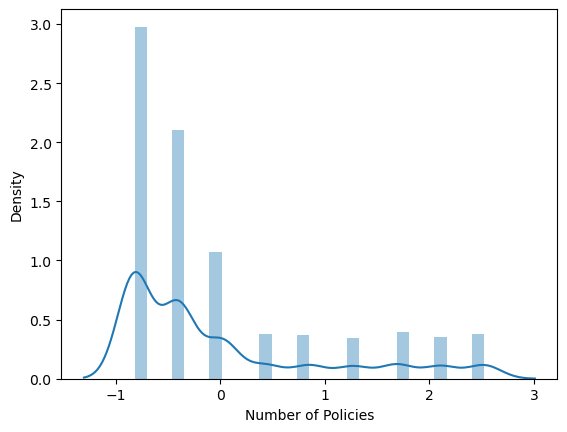

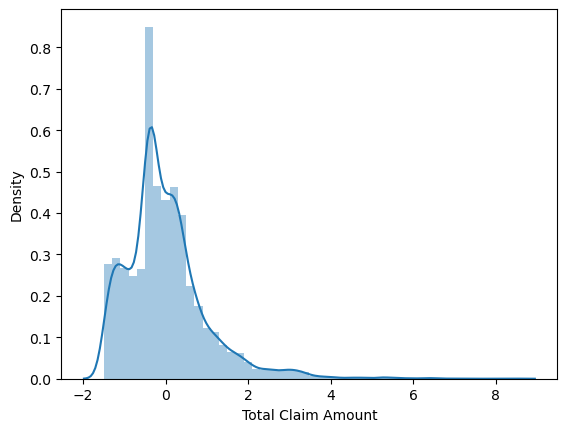

In [36]:
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

In [43]:
transformer = MinMaxScaler().fit(X_num) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(X_num) #This is a an array of arrays
print(x_minmax.shape)

(9134, 8)


In [44]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])